In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("global temp.csv", parse_dates=["Year"])

In [52]:
df["Year"] = pd.to_datetime(df.Year, format="%Y")
data = df.drop(["Year"], axis=1)
data.index = df.Year

In [53]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data.drop("Value", axis=1), -1, 1).eig

array([4.27332804e-05])

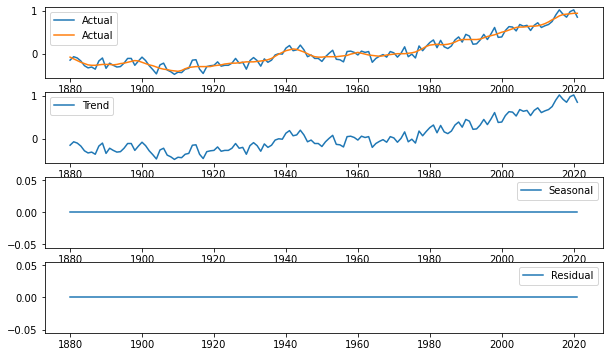

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decom=seasonal_decompose(data["Value"])
dftend=decom.trend
dfsea=decom.seasonal
dfres=decom.resid
plt.figure(figsize=(10,6))
plt.subplot (411)
plt.plot(data,label='Actual')
plt.legend()
plt.subplot (412)
plt.plot(dftend,label='Trend')
plt.legend()
plt.subplot (413)
plt.plot(dfsea,label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(dfres, label='Residual')
plt.legend()

In [55]:
from pmdarima.arima import auto_arima

model = auto_arima(data["Value"], seasonal=True, information_criterion="aic")

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 125.143
Date:                Mon, 18 Jul 2022   AIC                           -238.287
Time:                        12:08:08   BIC                           -220.594
Sample:                             0   HQIC                          -231.097
                                - 142                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0148      0.007      2.151      0.031       0.001       0.028
ar.L1         -0.9310      0.074    -12.557      0.000      -1.076      -0.786
ma.L1          0.6444      0.112      5.770      0.000       0.426       0.863
ma.L2         -0.5343      0.095     -5.643      0.000      -0.720      -0.349
ma.L3         -0.3278      0.089     -3.701      0.000      -0.501      -0.154
sigma2         0.0100      0.002      6.349      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.76   Prob(JB):                         0.15
Heteroskedasticity (H):               1.19   Skew:                            -0.07
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
size = int(len(data) * 0.75)

Xtrain, Xtest = data[0:size], data[size:]

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Xtrain["Value"], order=(2, 4, 1), seasonal_order=(1, 0, 1, 12))
result = model.fit()

testprid = pd.DataFrame(result.predict(start=len(Xtrain), end=len(data)))
testprid.columns = ['Prediction']

data = pd.concat((data, testprid), axis=1)

/Users/n30gu1/mambaforge/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/n30gu1/mambaforge/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/n30gu1/mambaforge/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71125D+00    |proj g|=  1.42615D+01

At iterate    5    f=  1.29306D-01    |proj g|=  1.19979D+00

At iterate   10    f= -8.48099D-02    |proj g|=  2.07415D-01

At iterate   15    f= -1.34627D-01    |proj g|=  2.60506D-02

At iterate   20    f= -1.41899D-01    |proj g|=  1.17501D-02

At iterate   25    f= -1.42622D-01    |proj g|=  1.21654D-02

At iterate   30    f= -1.43062D-01    |proj g|=  2.40295D-01

At iterate   35    f= -1.44735D-01    |proj g|=  2.45070D-01

At iterate   40    f= -1.48401D-01    |proj g|=  2.34921D-02

At iterate   45    f= -1.48855D-01    |proj g|=  4.59970D-03

At iterate   50    f= -1.48857D-01    |proj g|=  7.57814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/n30gu1/mambaforge/envs/tf/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


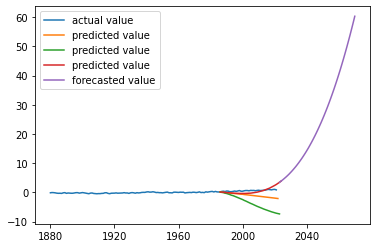

In [62]:
yhat = result.predict(start="2022-03-01", end="2070-01-01")

plt.plot(data.index, data["Value"], label="actual value")
plt.plot(data.index, data["Prediction"], label="predicted value")
plt.plot(pd.DataFrame(yhat), label="forecasted value")

plt.legend()